In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [4]:
dui_tax_short = pd.DataFrame.from_csv('dui_tax_short.csv', index_col=None)

In [5]:
dui_tax_short

,ACC_MIL,ACH_MIL,YEAR,STATE_SHORT,POP_MIL,SUSPEND,INTERLOCK_1ST,INTERLOCK_REPEAT,GALLONS_ALCOHOL_PER_CAP_21,BEER_TAX,PERCENT_POVERTY,MEDIAN_INCOME,PERCENT_UNINSURE,LESS_HS_P,HS_P,SOME_C_P,BACHELORS_P,GRAD_PROF_P
0,806.136433,48.569874,2011,AL,4.858979,yes,no,yes,22331,1.05,19.1,41427,16.6,0.180897,0.314334,0.285068,0.139643,0.080058
1,806.136433,46.100220,2012,AL,4.858979,yes,no,yes,22656,1.05,19.0,41610,15.8,0.174023,0.313100,0.290229,0.141521,0.081127
2,806.136433,44.042174,2013,AL,4.858979,yes,no,yes,22491,1.05,18.9,42882,15.9,0.168852,0.310562,0.294274,0.143547,0.082766
3,806.136433,47.952461,2014,AL,4.858979,yes,no,yes,22481,1.05,19.2,42917,14.2,0.162953,0.310687,0.295833,0.144587,0.085940
4,398.140926,24.375975,2011,AK,0.738432,yes,no,yes,32713,1.07,10.8,65699,21.7,0.086375,0.272442,0.369075,0.176662,0.095446
5,398.140926,20.313313,2012,AK,0.738432,yes,no,yes,32236,1.07,10.8,66503,22.3,0.084130,0.270973,0.370134,0.177505,0.097258
6,398.140926,20.313313,2013,AK,0.738432,yes,no,yes,31277,1.07,10.1,70058,20.8,0.083634,0.273077,0.368287,0.177079,0.097924
7,398.140926,35.209742,2014,AK,0.738432,yes,no,yes,31696,1.07,11.4,70898,19.0,0.081900,0.275051,0.366203,0.178704,0.098143
8,555.501449,28.265695,2011,AZ,6.828065,yes,no,yes,27228,0.16,19.0,46710,19.6,0.148176,0.247291,0.340564,0.168360,0.095609
9,555.501449,28.705058,2012,AZ,6.828065,yes,no,yes,27627,0.16,18.7,47796,20.4,0.145577,0.243979,0.344151,0.169160,0.097133


In [95]:
features = pd.DataFrame(dui_tax_short)
features = features.drop('ACH_MIL', axis=1)
features = features.drop('ACC_MIL', axis=1)

targets = dui_tax_short.ACH_MIL

In [73]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [86]:
features.columns

Index(['YEAR', 'STATE_SHORT', 'POP_MIL', 'SUSPEND', 'INTERLOCK_1ST',
       'INTERLOCK_REPEAT', 'GALLONS_ALCOHOL_PER_CAP_21', 'BEER_TAX',
       'PERCENT_POVERTY', 'MEDIAN_INCOME', 'PERCENT_UNINSURE', 'LESS_HS_P',
       'HS_P', 'SOME_C_P', 'BACHELORS_P', 'GRAD_PROF_P'],
      dtype='object')

In [89]:
range(len(features.columns))

range(0, 16)

In [96]:
#rf in python cannot take strings
#range(len(features.columns)
for i in [1,3,4,5]:
    features.iloc[:,i] = le.fit_transform(features.iloc[:,i])

In [97]:
features

,YEAR,STATE_SHORT,POP_MIL,SUSPEND,INTERLOCK_1ST,INTERLOCK_REPEAT,GALLONS_ALCOHOL_PER_CAP_21,BEER_TAX,PERCENT_POVERTY,MEDIAN_INCOME,PERCENT_UNINSURE,LESS_HS_P,HS_P,SOME_C_P,BACHELORS_P,GRAD_PROF_P
0,2011,1,4.858979,1,0,2,22331,1.05,19.1,41427,16.6,0.180897,0.314334,0.285068,0.139643,0.080058
1,2012,1,4.858979,1,0,2,22656,1.05,19.0,41610,15.8,0.174023,0.313100,0.290229,0.141521,0.081127
2,2013,1,4.858979,1,0,2,22491,1.05,18.9,42882,15.9,0.168852,0.310562,0.294274,0.143547,0.082766
3,2014,1,4.858979,1,0,2,22481,1.05,19.2,42917,14.2,0.162953,0.310687,0.295833,0.144587,0.085940
4,2011,0,0.738432,1,0,2,32713,1.07,10.8,65699,21.7,0.086375,0.272442,0.369075,0.176662,0.095446
5,2012,0,0.738432,1,0,2,32236,1.07,10.8,66503,22.3,0.084130,0.270973,0.370134,0.177505,0.097258
6,2013,0,0.738432,1,0,2,31277,1.07,10.1,70058,20.8,0.083634,0.273077,0.368287,0.177079,0.097924
7,2014,0,0.738432,1,0,2,31696,1.07,11.4,70898,19.0,0.081900,0.275051,0.366203,0.178704,0.098143
8,2011,3,6.828065,1,0,2,27228,0.16,19.0,46710,19.6,0.148176,0.247291,0.340564,0.168360,0.095609
9,2012,3,6.828065,1,0,2,27627,0.16,18.7,47796,20.4,0.145577,0.243979,0.344151,0.169160,0.097133


In [117]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=52)

In [127]:
rf = RandomForestRegressor(n_estimators=10000, oob_score=True, random_state=52)
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10000, n_jobs=1, oob_score=True, random_state=52,
           verbose=0, warm_start=False)

In [128]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)


print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.695
Test data R-2 score:  0.73
Test data Spearman correlation: 0.9
Test data Pearson correlation: 0.863


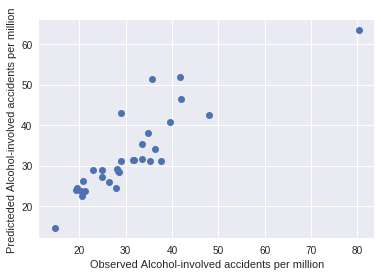

In [120]:
plt.plot(y_test, predicted_test, "o")
plt.ylabel('Predicteded Alcohol-involved accidents per million')
plt.xlabel('Observed Alcohol-involved accidents per million')

plt.savefig('obs_pred_test.png')

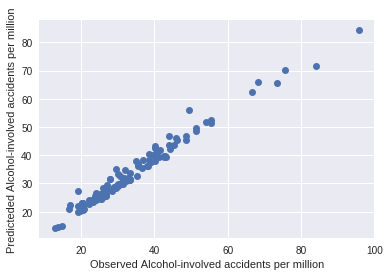

In [121]:
plt.plot(y_train, predicted_train, "o")
plt.ylabel('Predicteded Alcohol-involved accidents per million')
plt.xlabel('Observed Alcohol-involved accidents per million')

plt.savefig('obs_pred_train.png')

Feature ranking:
1. feature 9 (0.244870)
2. feature 11 (0.173091)
3. feature 2 (0.135761)
4. feature 15 (0.103228)
5. feature 12 (0.059745)
6. feature 13 (0.047463)
7. feature 14 (0.041321)
8. feature 10 (0.039127)
9. feature 6 (0.038314)
10. feature 7 (0.033716)
11. feature 1 (0.032228)
12. feature 8 (0.029440)
13. feature 5 (0.012827)
14. feature 0 (0.005945)
15. feature 3 (0.002926)
16. feature 4 (0.000000)


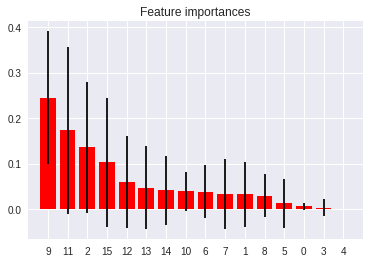

In [122]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [82]:
features.columns

Index(['YEAR', 'STATE_SHORT', 'POP_MIL', 'SUSPEND', 'INTERLOCK_1ST',
       'INTERLOCK_REPEAT', 'GALLONS_ALCOHOL_PER_CAP_21', 'BEER_TAX',
       'PERCENT_POVERTY', 'MEDIAN_INCOME', 'PERCENT_UNINSURE', 'LESS_HS_P',
       'HS_P', 'SOME_C_P', 'BACHELORS_P', 'GRAD_PROF_P'],
      dtype='object')

In [83]:
importances[indices]

array([ 0.24486979,  0.17309059,  0.13576079,  0.10322799,  0.05974485,
        0.04746251,  0.04132081,  0.03912666,  0.03831385,  0.03371609,
        0.03222822,  0.02944019,  0.01282671,  0.00594539,  0.00292556,  0.        ])

In [84]:
range(X_train.shape[1]), indices

(range(0, 16),
 array([ 9, 11,  2, 15, 12, 13, 14, 10,  6,  7,  1,  8,  5,  0,  3,  4]))

In [123]:
features.columns[indices]

Index(['MEDIAN_INCOME', 'LESS_HS_P', 'POP_MIL', 'GRAD_PROF_P', 'HS_P',
       'SOME_C_P', 'BACHELORS_P', 'PERCENT_UNINSURE',
       'GALLONS_ALCOHOL_PER_CAP_21', 'BEER_TAX', 'STATE_SHORT',
       'PERCENT_POVERTY', 'INTERLOCK_REPEAT', 'YEAR', 'SUSPEND',
       'INTERLOCK_1ST'],
      dtype='object')